In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from pypinyin import pinyin, lazy_pinyin, Style

In [60]:
def word_to_py(word):
    temp = pinyin(word,style=Style.FIRST_LETTER)
    result = ""
    for one_word in [_[0] for _ in temp]:
        result+=str(one_word).upper()
    return result

In [61]:
# 决策树保存路径
model_path = r"F:\cache_data\model_path\dy\soil_type\cart"
model_name = "cart_tree.pkl"

In [73]:
dataset = pd.read_csv(r"F:\cache_data\frequency_filter\dy\scaler_csv\dy_stander_filter.csv")
dataset.dropna(inplace=True)

In [74]:
# 标签化
dataset["TZ_label"] = dataset.TZ.astype("category").cat.codes
result = dataset.groupby('TZ_label')["TZ"].apply(lambda x: list(x.unique())).to_dict()
print(result)

{0: ['101'], 1: ['102'], 2: ['103'], 3: ['104'], 4: ['105'], 5: ['106'], 6: ['107'], 7: ['108'], 8: ['112'], 9: ['113'], 10: ['114'], 11: ['115'], 12: ['116'], 13: ['117'], 14: ['118'], 15: ['119'], 16: ['11e'], 17: ['120'], 18: ['125'], 19: ['126'], 20: ['129'], 21: ['12b'], 22: ['12c'], 23: ['12d'], 24: ['12e'], 25: ['12f'], 26: ['130'], 27: ['131'], 28: ['132'], 29: ['135'], 30: ['136'], 31: ['137'], 32: ['138'], 33: ['139'], 34: ['13d'], 35: ['13e'], 36: ['13f'], 37: ['141'], 38: ['143'], 39: ['14d'], 40: ['14e'], 41: ['14f'], 42: ['15'], 43: ['15d'], 44: ['15e'], 45: ['15f'], 46: ['18d'], 47: ['1e'], 48: ['1f'], 49: ['20'], 50: ['21'], 51: ['22'], 52: ['23'], 53: ['24'], 54: ['26'], 55: ['29'], 56: ['2b'], 57: ['2f'], 58: ['30'], 59: ['31'], 60: ['32'], 61: ['33'], 62: ['34'], 63: ['4d'], 64: ['4e'], 65: ['4f'], 66: ['60'], 67: ['61d'], 68: ['61e'], 69: ['61f'], 70: ['63'], 71: ['63b'], 72: ['63d'], 73: ['63e'], 74: ['63f'], 75: ['64d'], 76: ['64f'], 77: ['65'], 78: ['65d'], 79: [

In [75]:
dataset['DZ']=dataset['DZ'].astype('category')
dataset['DL']=dataset['DL'].astype('category')
dataset['TZ_label']=dataset['TZ_label'].astype('category')

In [76]:
features = dataset.columns[1:-1]
target = "TZ_label"

In [77]:
X = dataset[features]
y = dataset[target]
# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# 通过网格搜索找到最优超参数
params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100,10))} 
grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=StratifiedKFold(n_splits=5))
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_params_)

d:\worker_code\.venvgis\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


{'criterion': 'entropy', 'max_depth': 12}


In [70]:

random_state = 42
tree_classifier = DecisionTreeClassifier(random_state=42,**grid_tree.best_params_)
# tree_classifier = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth=5)
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42)

In [71]:
# 保存模型
with open(os.path.join(model_path,model_name), 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# 加载模型
with open(os.path.join(model_path,model_name), 'rb') as f:
    predictor = pickle.load(f)

In [72]:
predictor = tree_classifier
# 查看准确率
y_test_pred= predictor.predict(Xtest)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

0.9328202995008319 0.49001663893510816


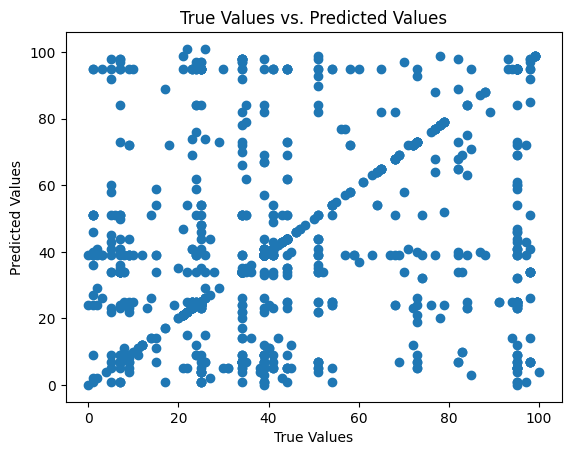

In [36]:
# 预测散点图
plt.scatter(ytest.values, y_test_pred)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

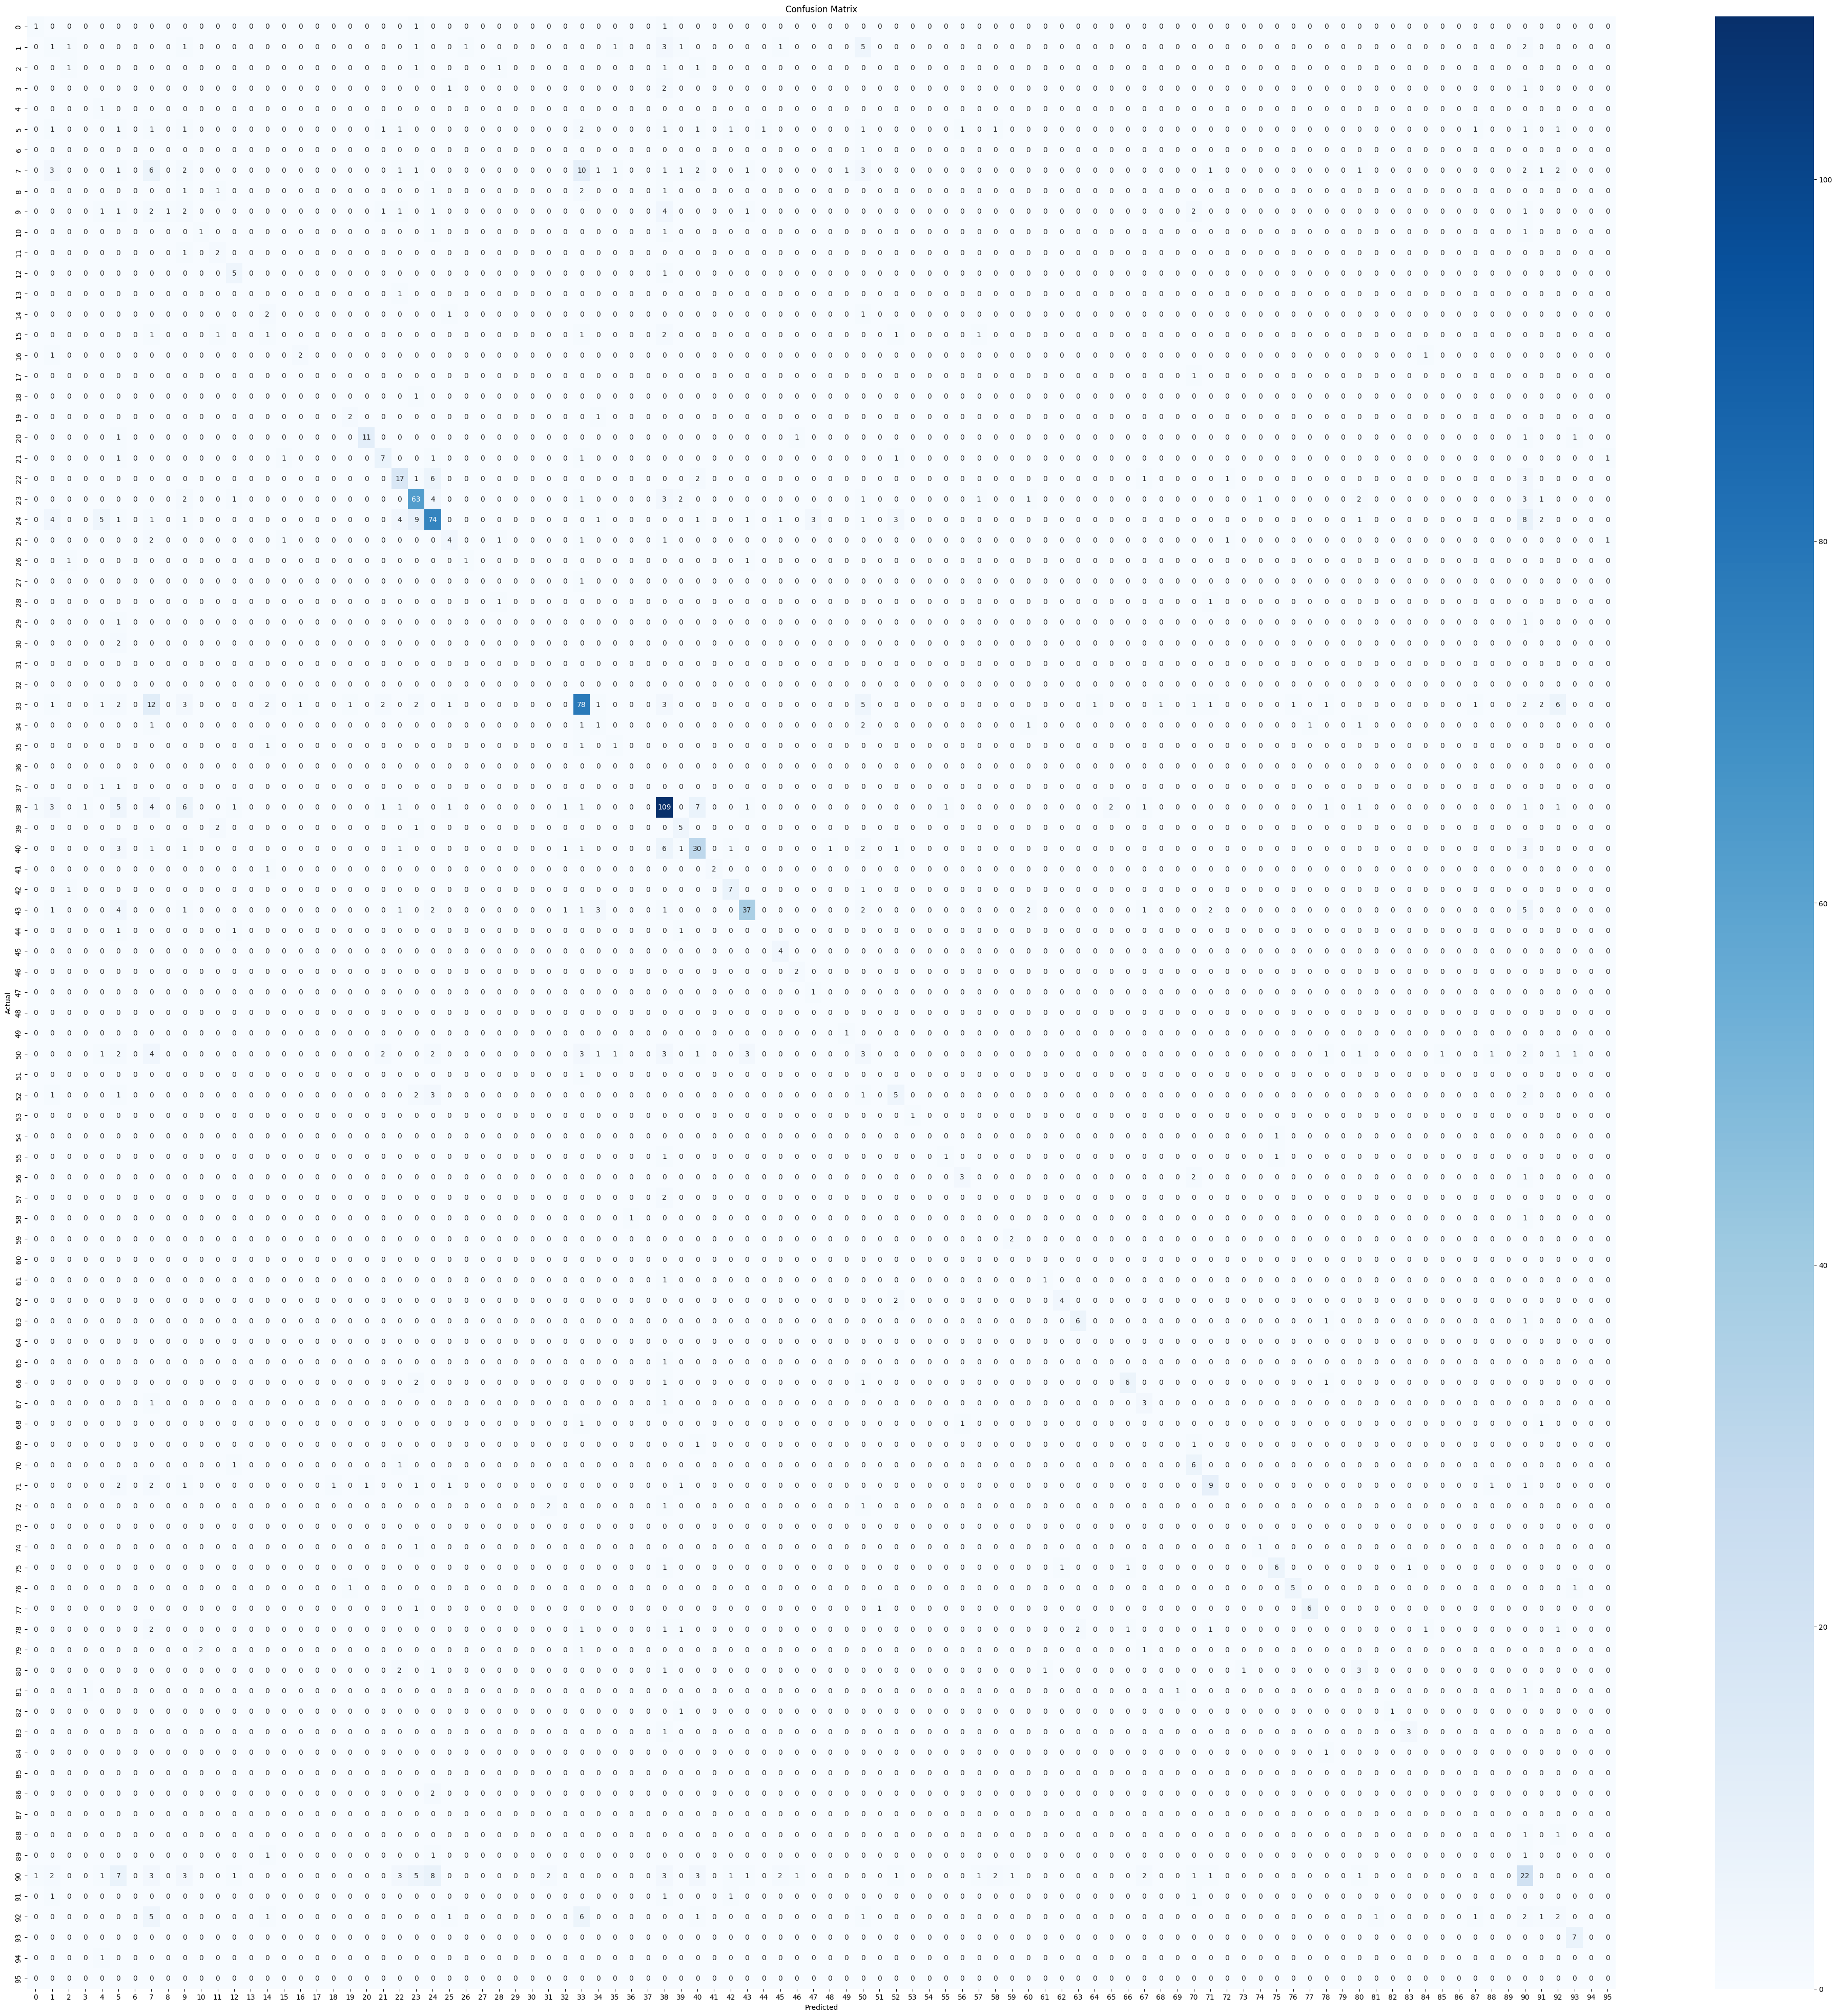

In [37]:
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_test_pred)
plt.figure(figsize=(50,50))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [38]:
name_label = [_[0] for _ in list(result.values())]


In [49]:
viz_model = dtreeviz.model(predictor,
                           X_train=X, y_train=y,
                           feature_names=features,
                           target_name=target, class_names= name_label)

In [51]:
viz_model.view()

ValueError: Target label values (for now) must be 0..100 for n=101 labels

In [43]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names= name_label)

In [41]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target)

In [ ]:
viz_model.view()

In [ ]:
viz_model.view(fancy=False)